## 3. Melengkapi sintaks untuk memasukkan data dari python ke MySQL

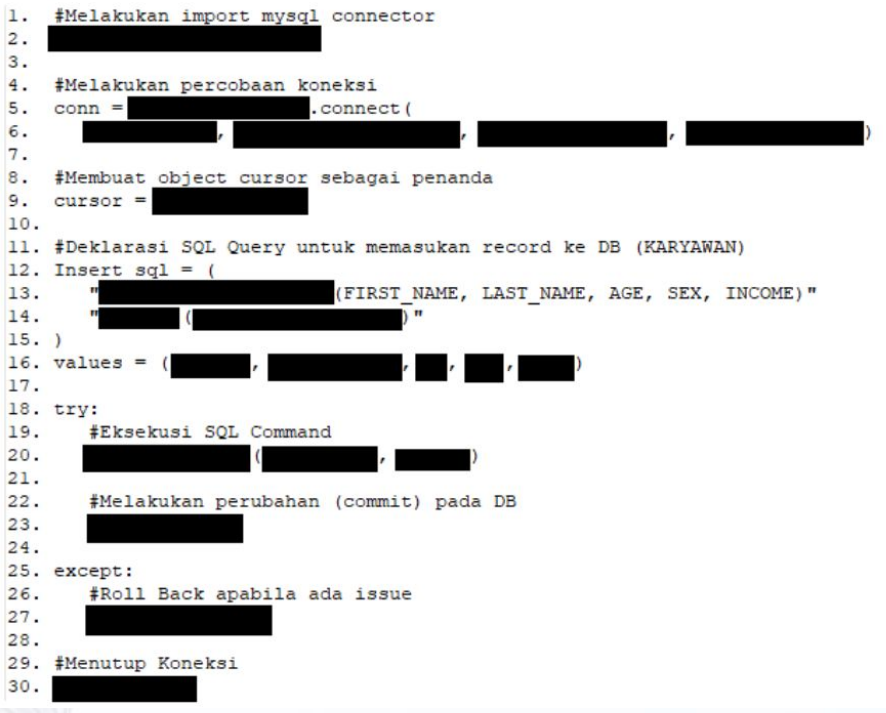

In [1]:
#Melakukan import mysql connector
import mysql.connector

#Melakukan percobaan koneksi ke database db
conn = mysql.connector.connect(
        host="localhost", user="root", passwd="alfatih123", database="db" )

#Membuat kursor sebagai penanda

cursor = conn.cursor()

#Deklarasi SQL Query untuk memasukkan record ke DB (KARYAWAN)
insert_sql = (
    "INSERT INTO karyawan (FIRST_NAME, LAST_NAME, AGE, SEX, INCOME) " 
    "VALUES (%s, %s, %s, %s, %s)"
)
values = ("Indy", "Faizah", "20", "F", "3000000")

try:
    #Eksekusi SQL Command
    cursor.execute(insert_sql, values)
    
    #Melakukan perubahan (commit) pada DB
    conn.commit()    
    print("Berhasil terhubung ke database")
    
except mysql.connector.Error as err:
    #Roll Back apabila ada issue
    conn.rollback()

#Menutup koneksi
conn.close()

Berhasil terhubung ke database


## SQL Queries in Python (4 & 5)

### 4.)

### Buat connection dan cursor untuk mengakses database KALBE di MySQL

In [43]:
import mysql.connector
import pandas as pd

#Melakukan percobaan koneksi 
conn = mysql.connector.connect(
        host="localhost", user="root", passwd="alfatih123", database="KALBE" )
cursor = conn.cursor()
if conn.is_connected():
        print("Berhasil terhubung ke database")
else :
        print("Gagal terhubung ke database")

Berhasil terhubung ke database


### Buat dan tampilkan tabel Inventory

In [45]:
query = "drop table IF EXISTS Inventory;"
execute = cursor.execute(query)
query = "CREATE TABLE Inventory (Item_code CHAR(4) PRIMARY KEY, Item_name VARCHAR(50) NOT NULL, Item_price INT, Item_total INT, UNIQUE (Item_name));"
execute = cursor.execute(query)
query = "INSERT INTO Inventory VALUES ('2341', 'Promag Tablet', '3000', '100'), ('2342', 'Hydro Coco 250ML', '7000', '20'), ('2343', 'Nutrive Benecol', '20000', '30'), ('2344', 'Blackmore Vit C 500Mg', '95000', '45'), ('2345', 'Entrasol Gold 370G', '90000', '120');"
execute = cursor.execute(query)
inventory = "SELECT * FROM Inventory"
show = pd.read_sql(inventory, conn)
show

C:\Users\LENOVO IDPGAMING\AppData\Local\Temp\ipykernel_35340\3926573354.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  show = pd.read_sql(inventory, conn)


,Item_code,Item_name,Item_price,Item_total
0,2341,Promag Tablet,3000,100
1,2342,Hydro Coco 250ML,7000,20
2,2343,Nutrive Benecol,20000,30
3,2344,Blackmore Vit C 500Mg,95000,45
4,2345,Entrasol Gold 370G,90000,120


### Menampilkan Item_name yang memiliki jumlah nilai terbanyak pada variabel Item_total

In [46]:
query = "SELECT Item_name FROM Inventory WHERE Item_total = (SELECT MAX(Item_total) FROM Inventory);"
show = pd.read_sql(query, conn)
show
    

C:\Users\LENOVO IDPGAMING\AppData\Local\Temp\ipykernel_35340\2451483036.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  show = pd.read_sql(query, conn)


,Item_name
0,Entrasol Gold 370G


### Update kolom Item_price dari hasil yang diperoleh dari query sebelumnya

In [48]:
query = "UPDATE Inventory SET Item_price = 100000 WHERE Item_name = 'Entrasol Gold 370G';"
execute = cursor.execute(query)
query = "SELECT * FROM Inventory"
show = pd.read_sql(query, conn)
show

C:\Users\LENOVO IDPGAMING\AppData\Local\Temp\ipykernel_35340\3775889220.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  show = pd.read_sql(query, conn)


,Item_code,Item_name,Item_price,Item_total
0,2341,Promag Tablet,3000,100
1,2342,Hydro Coco 250ML,7000,20
2,2343,Nutrive Benecol,20000,30
3,2344,Blackmore Vit C 500Mg,95000,45
4,2345,Entrasol Gold 370G,100000,120


### Melihat apa yang terjadi bila dimasukkan record dengan item_code 2343

In [49]:
try:
  query = "INSERT INTO Inventory(Item_code, Item_name) VALUES ('2343', 'Kalbe Product');"
  execute = cursor.execute(query)
except mysql.connector.Error as err:
  print(f"Error: {err}")

Error: 1062 (23000): Duplicate entry '2343' for key 'inventory.PRIMARY'


### Menghapus record dengan item_total terkecil

#### Mencari nilai total item terkecil

In [50]:
query = "SELECT Item_name FROM Inventory WHERE Item_total = (SELECT MIN(Item_total) FROM Inventory);"
show = pd.read_sql(query, conn)
show

C:\Users\LENOVO IDPGAMING\AppData\Local\Temp\ipykernel_35340\1694525324.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  show = pd.read_sql(query, conn)


,Item_name
0,Hydro Coco 250ML


#### Menghapus record

In [52]:
query = "DELETE FROM Inventory WHERE Item_name = 'Hydro Coco 250ML';"
execute = cursor.execute(query)
show = pd.read_sql(inventory, conn)
show

C:\Users\LENOVO IDPGAMING\AppData\Local\Temp\ipykernel_35340\3588345552.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  show = pd.read_sql(inventory, conn)


,Item_code,Item_name,Item_price,Item_total
0,2341,Promag Tablet,3000,100
1,2343,Nutrive Benecol,20000,30
2,2344,Blackmore Vit C 500Mg,95000,45
3,2345,Entrasol Gold 370G,100000,120


### 5.)

### Tabel customer_order

In [54]:
cust_orders = "SELECT * FROM customer_orders;"
show = pd.read_sql(cust_orders, conn)
show

C:\Users\LENOVO IDPGAMING\AppData\Local\Temp\ipykernel_35340\146901305.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  show = pd.read_sql(cust_orders, conn)


,order_no,purchase_amount,order_date,customer_id,salesman_id
0,10001,150,2022-10-05,2005,3002
1,10009,279,2022-09-10,2001,3005
2,10002,65,2022-10-05,2002,3001
3,10004,110,2022-08-17,2009,3003
4,10007,948,2022-09-10,2005,3002
5,10005,2400,2022-07-27,2007,3001


### purchase_amount < 100 atau tidak mengandung order_date is >= 25 Aug 2022 dan customer_id > 2001 dari tabel customer_orders

In [55]:
query = "SELECT * FROM customer_orders WHERE purchase_amount < 100 OR (order_date < '2022-08-25' AND customer_id <= 2001);"
show = pd.read_sql(query, conn)
show

C:\Users\LENOVO IDPGAMING\AppData\Local\Temp\ipykernel_35340\3761564673.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  show = pd.read_sql(query, conn)


,order_no,purchase_amount,order_date,customer_id,salesman_id
0,10002,65,2022-10-05,2002,3001
